In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import os
import matplotlib.cm as cm
from scipy.interpolate import interp1d
from EOF import EOF
import datetime 
from scipy.interpolate import RectBivariateSpline

In [2]:
from Dycore import Dycore
def read_all_var(pr_start, pr_to, pr_leap, start, end, internal_day, total_file):
        total_pr = int((pr_to - pr_start) / pr_leap)
        total_day = int(total_file*internal_day)
        
        # qv      = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        qv_diff = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        # u       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        # v       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        # w       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        # t       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        # p       = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        # ps      = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
        p_half  = np.zeros(((((total_pr, total_day, 21, 64, 128)))))
        # z_full  = np.zeros(((((total_pr, total_day, 20, 64, 128)))))
    
        
        a = 0
        for pr in range(pr_start, pr_to, pr_leap):
            k = 0
            for day in range(start,end,internal_day):
                print(day)
                file  = f"HSt42_{pr}/RH80_PR{pr}_20000day_startfrom_{day}day_final.dat"
                dycore = Dycore(file)
                
                # qv[a,k*100:(k+1)*100,:,:,:]      = dycore.qv
                qv_diff[a,k*100:(k+1)*100,:,:,:] = dycore.qv_diff
                # u[a,k*100:(k+1)*100,:,:,:]       = dycore.u
                # v[a,k*100:(k+1)*100,:,:,:]       = dycore.v
                # w[a,k*100:(k+1)*100,:,:,:]       = dycore.w
                # z_full[a,k*100:(k+1)*100,:,:,:]       = dycore.z_full
                
                # t[a,k*100:(k+1)*100,:,:,:]       = dycore.t
                # ps[a,k*100:(k+1)*100,:,:,:]      = dycore.ps
                # p[a,k*100:(k+1)*100,:,:,:]       = dycore.p
                p_half[a,k*100:(k+1)*100,:,:,:]  = dycore.p_half
                            
                k += 1
            a += 1
        # return qv, qv_diff, u, v, w, z_full, t, ps, p, p_half
        return qv_diff, p_half

        # return t
        # return z_full
        # return u, v, w, t, qv, qv_diff
        # return p, ps, p_half, z_full

    

In [3]:
pr_start = 0
pr_leap = 10
pr_to = 60
total_pr = (pr_to - pr_start) / pr_leap

start = 500
end   = 20000
internal_day = 100
total_day = int((end -start)/internal_day) * internal_day

total_file = int((end - start) / internal_day)

# qv, qv_diff, u, v, w, z_full, t, ps, p, p_half = read_all_var(pr_start, pr_to, pr_leap, start , end, internal_day, total_file)  # 
# qv_diff, p_half = read_all_var(pr_start, pr_to, pr_leap, start , end, internal_day, total_file)  # 



print("done")


done


In [5]:
# u_prime_file       = h5py.File("PR10_50_500_20000day_u_prime.h5", "r")
# u_prime       = np.asarray(u_prime_file["u_prime"][:,:,:])
# v_prime_file       = h5py.File("PR10_50_500_20000day_v_prime.h5", "r")
# v_prime       = np.asarray(v_prime_file["v_prime"][:,:,:])
# EMF_0 = np.nanmean(u_prime * v_prime, axis=4)
# with h5py.File('PR10_50_500_20000day_EMF_origin_grid.h5','w') as EMF_file :
#     EMF_file.create_dataset('EMF',data=EMF_0)

In [ ]:
theta_prime0_file = h5py.File("PR0_500_20000day_theta_prime.h5", "r")

theta_prime0  = np.asarray(theta_prime0_file["theta_prime"][:,int(start):,:,:])

# theta_prime01 = np.append(theta_prime0, theta_prime1, axis=1)
###########################################################
theta_prime2_file = h5py.File("PR10_50_500_20000day_theta_prime.h5", "r")

theta_prime2  = np.asarray(theta_prime2_file["theta_prime"][:,int(start):,:,:])

theta_prime = np.append(theta_prime0, theta_prime2, axis=0)


In [ ]:
# theta_prime = np.append(theta_prime01, theta_prime23, axis=0)

In [ ]:
theta0_file = h5py.File("PR0_500_20000day_theta.h5", "r")
# theta1_file = h5py.File("PR0_10000_20000day_theta.h5", "r")

theta0  = np.asarray(theta0_file["theta"][:,int(start):,:,:])
# theta1  = np.asarray(theta1_file["theta"][:,:,:,:])

# theta01 = np.append(theta0, theta1, axis=1)
###########################################################
theta2_file = h5py.File("PR10_50_500_20000day_theta.h5", "r")
# theta3_file = h5py.File("PR10_50_10000_20000day_theta.h5", "r")

theta2  = np.asarray(theta2_file["theta"][:,int(start):,:,:])
# theta3  = np.asarray(theta3_file["theta"][:,:,:,:])

theta = np.append(theta0, theta2, axis=1)


In [ ]:
# theta = np.append(theta01, theta23, axis=0)


In [ ]:

bza =  theta_prime / np.nanmean(theta, axis=0) * 9.81


In [ ]:
with h5py.File('PR0_50_500_20000day_b_prime_new.h5','w') as b_prime_file :
    b_prime_file.create_dataset('b_prime',data=bza)

In [ ]:
# test_file = h5py.File("PR0_500_20000day_b_prime.h5", "r")
# b_prime  = np.asarray(test_file["b_prime"][:,:,:,:])


In [ ]:
plt.figure()


In [ ]:
# with h5py.File('PR0_0_20000day_u.h5','w') as u_file :
#     u_file.create_dataset('u',data=u)
#     # u = np.asarray(u_file["u"][:,int(start):end,:,:,:])


# with h5py.File('PR0_0_20000day_qv.h5','w') as qv_file :
#     qv_file.create_dataset('qv',data=qv)
#     # qv = np.asarray(qv_file["qv"][:,int(start):end,:,:,:])


# with h5py.File('PR0_0_20000day_qv_diff.h5','w') as qv_diff_file :
#     qv_diff_file.create_dataset('qv_diff',data=qv_diff)
#     # qv_diff = np.asarray(qv_diff_file["qv_diff"][:,int(start):end,:,:,:])


# with h5py.File('PR0_0_20000day_v.h5','w') as v_file :
#     v_file.create_dataset('v',data=v)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File('PR0_0_20000day_t.h5','w') as t_file :
#     t_file.create_dataset('t',data=t)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File('PR0_0_20000day_w.h5','w') as w_file :
#     w_file.create_dataset('w',data=w)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# with h5py.File('PR0_0_20000day_p.h5','w') as p_file :
#     p_file.create_dataset('p',data=p)
#     # p = np.asarray(p_file["p"][:,int(start):end,:,:,:])


# with h5py.File('PR0_0_20000day_ps.h5','w') as ps_file :
#     ps_file.create_dataset('ps',data=ps)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File('PR0_0_20000day_p_half.h5','w') as p_half_file :
#     p_half_file.create_dataset('p_half',data=p_half)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File('PR0_0_20000day_z_full.h5','w') as z_full_file :
#     z_full_file.create_dataset('z_full',data=z_full)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# print("PR0 saving done")

# After saving all var.ipynb

In [12]:
# ## read variables ###
# # u_file       = h5py.File("PR0_0_20000day_u.h5", "r")
# # v_file       = h5py.File("PR0_0_20000day_v.h5", "r")
# # w_file       = h5py.File("PR0_0_20000day_w.h5", "r")
# # t_file       = h5py.File("PR0_0_20000day_t.h5", "r")
# # qv_file      = h5py.File("PR0_0_20000day_qv.h5", "r")
# qv_diff_file = h5py.File("PR0_0_20000day_qv_diff.h5", "r")
# # p_file       = h5py.File("PR0_0_20000day_p.h5", "r")
# # ps_file      = h5py.File("PR0_0_20000day_ps.h5", "r")
# p_half_file  = h5py.File("PR0_0_20000day_p_half.h5", "r")
# # z_full_file  = h5py.File("PR0_0_20000day_z_full.h5", "r")

# # print("---1---")
# # u_origin       = np.asarray(u_file["u"][:,int(start):end,:,:,:])
# # v_origin       = np.asarray(v_file["v"][:,int(start):end,:,:,:])
# # print("---2---")
# # w_origin       = np.asarray(w_file["w"][:,int(start):end,:,:,:])
# # t_origin       = np.asarray(t_file["t"][:,int(start):end,:,:,:])
# # qv_origin       = np.asarray(qv_file["qv"][:,int(start):end,:,:,:])
# qv_diff_origin = np.asarray(qv_diff_file["qv_diff"][:,int(start):end,:,:,:])
# # print("---3---")
# # p_origin       = np.asarray(p_file["p"][:,int(start):end,:,:,:])
# # print("---4---")
# # ps_origin      = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])
# # print("---5---")
# p_half_origin  = np.asarray(p_half_file["p_half"][:,int(start):end,:,:,:])
# print("---6---")
# # z_full_origin       = np.asarray(z_full_file["z_full"][:,int(start):end,:,:,:])


# print("done")

# # u_file.close()
# # v_file.close()
# # w_file.close()
# # t_file.close()
# # qv_file.close()
# qv_diff_file.close()
# # p_file.close()
# # ps_file.close()
# p_half_file.close()
# # z_full_file.close()



# print("done")



---1---
---2---
---3---
---4---
---5---
---6---
done
done


In [14]:
# u = u_origin
# v = v_origin
# w = w_origin
# t = t_origin
# qv = qv_origin
# qv_diff = qv_diff_origin
# p = p_origin
# ps = ps_origin
# p_half = p_half_origin
# z_full = z_full_origin


In [ ]:
# # recreate PR0_50_0_20000day
# with h5py.File('PR0_50_0_20000day_qv_diff.h5','w') as qv_diff_file :
#     qv_diff_file.create_dataset('qv_diff',data=qv_diff)
#     # qv_diff = np.asarray(qv_diff_file["qv_diff"][:,int(start):end,:,:,:])

# with h5py.File('PR0_50_0_20000day_p_half.h5','w') as p_half_file :
#     p_half_file.create_dataset('p_half',data=p_half)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# time mean T for EHF

In [15]:
# Ttm = np.nanmean(t, axis=1)
# with h5py.File('PR0_500_20000day_t_time_mean.h5','w') as Ttm_file :
#     Ttm_file.create_dataset('t',data=Ttm)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# time mean, zonal mean

In [7]:
# u_mean = np.nanmean(u, axis=(1,4))
# qv_mean = np.nanmean(qv, axis=(1,4))
# qv_diff_mean = np.nanmean(qv_diff, axis=(1,4))
# p_mean = np.nanmean(p, axis=(1,4))
# ps_mean = np.nanmean(ps, axis=(1,4))
# p_half_mean = np.nanmean(p_half, axis=(1,4))
# w_mean = np.nanmean(w, axis=(1,4))
# z_full_mean = np.nanmean(z_full, axis=(1,4))
# v_mean = np.nanmean(v, axis=(1,4))
# t_mean = np.nanmean(t, axis=(1,4))
# print("done")


In [8]:
# # you would get (5,20,64)
# str = "time_zonal_mean"
# with h5py.File(str+'PR0_0_20000day_u.h5','w') as u_file :
#     u_file.create_dataset('u',data=u_mean)
#     # u = np.asarray(u_file["u"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_20000day_qv.h5','w') as qv_file :
#     qv_file.create_dataset('qv',data=qv_mean)
#     # qv = np.asarray(qv_file["qv"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_20000day_qv_diff.h5','w') as qv_diff_file :
#     qv_diff_file.create_dataset('qv_diff',data=qv_diff_mean)
#     # qv_diff = np.asarray(qv_diff_file["qv_diff"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_20000day_v.h5','w') as v_file :
#     v_file.create_dataset('v',data=v_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_20000day_t.h5','w') as t_file :
#     t_file.create_dataset('t',data=t_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_20000day_w.h5','w') as w_file :
#     w_file.create_dataset('w',data=w_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# with h5py.File(str+'PR0_0_20000day_p.h5','w') as p_file :
#     p_file.create_dataset('p',data=p_mean)
#     # p = np.asarray(p_file["p"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_20000day_ps.h5','w') as ps_file :
#     ps_file.create_dataset('ps',data=ps_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_20000day_p_half.h5','w') as p_half_file :
#     p_half_file.create_dataset('p_half',data=p_half_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_20000day_z_full.h5','w') as z_full_file :
#     z_full_file.create_dataset('z_full',data=z_full_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# print("done")

In [9]:
# str = "time_zonal_mean"

# u_test      = h5py.File(str+"PR10_50_0_20000day_u.h5", "r")
# u_origin       = np.asarray(u_test["u"][:,:,:])


In [10]:
# print(u_origin.shape)

# zonal mean

In [11]:
# u_mean = np.nanmean(u, axis=(4))
# v_mean = np.nanmean(v, axis=(4))
# w_mean = np.nanmean(w, axis=(4))
# t_mean = np.nanmean(t, axis=(4))

# qv_mean = np.nanmean(qv, axis=(4))
# qv_diff_mean = np.nanmean(qv_diff, axis=(4))
# p_mean = np.nanmean(p, axis=(4))
# ps_mean = np.nanmean(ps, axis=(4))
# p_half_mean = np.nanmean(p_half, axis=(4))
# z_full_mean = np.nanmean(z_full, axis=(4))



In [12]:
# # you would get (5,20,64)
# str = "tmp_zonal_mean"
# with h5py.File(str+'PR0_0_10000day_u.h5','w') as u_file :
#     u_file.create_dataset('u',data=u_mean)
#     # u = np.asarray(u_file["u"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_10000day_qv.h5','w') as qv_file :
#     qv_file.create_dataset('qv',data=qv_mean)
#     # qv = np.asarray(qv_file["qv"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_10000day_qv_diff.h5','w') as qv_diff_file :
#     qv_diff_file.create_dataset('qv_diff',data=qv_diff_mean)
#     # qv_diff = np.asarray(qv_diff_file["qv_diff"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_10000day_v.h5','w') as v_file :
#     v_file.create_dataset('v',data=v_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_10000day_t.h5','w') as t_file :
#     t_file.create_dataset('t',data=t_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_10000day_w.h5','w') as w_file :
#     w_file.create_dataset('w',data=w_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# with h5py.File(str+'PR0_0_10000day_p.h5','w') as p_file :
#     p_file.create_dataset('p',data=p_mean)
#     # p = np.asarray(p_file["p"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_10000day_ps.h5','w') as ps_file :
#     ps_file.create_dataset('ps',data=ps_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_10000day_p_half.h5','w') as p_half_file :
#     p_half_file.create_dataset('p_half',data=p_half_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_0_10000day_z_full.h5','w') as z_full_file :
#     z_full_file.create_dataset('z_full',data=z_full_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# print("finally done")

In [13]:
# # you would get (5,20,64)
# str = "tmp_zonal_mean"
# with h5py.File(str+'PR0_10000_20000day_u.h5','w') as u_file :
#     u_file.create_dataset('u',data=u_mean)
#     # u = np.asarray(u_file["u"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_10000_20000day_qv.h5','w') as qv_file :
#     qv_file.create_dataset('qv',data=qv_mean)
#     # qv = np.asarray(qv_file["qv"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_10000_20000day_qv_diff.h5','w') as qv_diff_file :
#     qv_diff_file.create_dataset('qv_diff',data=qv_diff_mean)
#     # qv_diff = np.asarray(qv_diff_file["qv_diff"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_10000_20000day_v.h5','w') as v_file :
#     v_file.create_dataset('v',data=v_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_10000_20000day_t.h5','w') as t_file :
#     t_file.create_dataset('t',data=t_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_10000_20000day_w.h5','w') as w_file :
#     w_file.create_dataset('w',data=w_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# with h5py.File(str+'PR0_10000_20000day_p.h5','w') as p_file :
#     p_file.create_dataset('p',data=p_mean)
#     # p = np.asarray(p_file["p"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_10000_20000day_ps.h5','w') as ps_file :
#     ps_file.create_dataset('ps',data=ps_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_10000_20000day_p_half.h5','w') as p_half_file :
#     p_half_file.create_dataset('p_half',data=p_half_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])


# with h5py.File(str+'PR0_10000_20000day_z_full.h5','w') as z_full_file :
#     z_full_file.create_dataset('z_full',data=z_full_mean)
#     # ps = np.asarray(ps_file["ps"][:,int(start):end,:,:,:])

# print("10000~20000day finally done")

# load test

In [7]:
# str = "tmp_zonal_mean"
# u_file1      = h5py.File(str+"PR0_0_10000day_u.h5", "r")
# u_file2      = h5py.File(str+"PR0_10000_20000day_u.h5", "r")

# u1       = np.asarray(u_file1["u"][:,:,:,:])
# u2       = np.asarray(u_file2["u"][:,:,:,:])
# # ####################################################################
# v_file1      = h5py.File(str+"PR0_0_10000day_v.h5", "r")
# v_file2      = h5py.File(str+"PR0_10000_20000day_v.h5", "r")

# v1       = np.asarray(v_file1["v"][:,:,:,:])
# v2       = np.asarray(v_file2["v"][:,:,:,:])
# ####################################################################
# t_file1      = h5py.File(str+"PR0_0_10000day_t.h5", "r")
# t_file2      = h5py.File(str+"PR0_10000_20000day_t.h5", "r")

# t1       = np.asarray(t_file1["t"][:,:,:,:])
# t2       = np.asarray(t_file2["t"][:,:,:,:])
# ####################################################################
# p_file1      = h5py.File(str+"PR0_0_10000day_p.h5", "r")
# p_file2      = h5py.File(str+"PR0_10000_20000day_p.h5", "r")

# p1       = np.asarray(p_file1["p"][:,:,:,:])
# p2       = np.asarray(p_file2["p"][:,:,:,:])
# ####################################################################
# ps_file1      = h5py.File(str+"PR0_0_10000day_ps.h5", "r")
# ps_file2      = h5py.File(str+"PR0_10000_20000day_ps.h5", "r")

# ps1       = np.asarray(ps_file1["ps"][:,:,:,:])
# ps2       = np.asarray(ps_file2["ps"][:,:,:,:])



In [8]:
# print(u1.shape)

In [9]:
# print(int(end-start))

In [10]:
# Uzm = np.append(u1, u2, axis=1)
# Vzm = np.append(v1, v2, axis=1)
# Tzm = np.append(t1, t2, axis=1)
# Pzm = np.append(p1, p2, axis=1)
# PSzm = np.append(ps1, ps2, axis=1)



# # print(Uzm.shape)

In [20]:
# total_day = int(end-start)
# u_prime = np.zeros(((((1, total_day, 20, 64, 128)))))
# v_prime = np.zeros(((((1, total_day, 20, 64, 128)))))
# t_prime = np.zeros(((((1, total_day, 20, 64, 128)))))


# for a in range(0, 1):
#     for j in range(total_day):
#         for i in range(128):    
#             u_prime[a,j,:,:,i] = u[a,j,:,:,i] - Uzm[a,int(j+start)] # np.rollaxis((np.rollaxis(u[a], 3, 0) - np.nanmean(u[a], axis=3)), 0, 4)
#             v_prime[a,j,:,:,i] = v[a,j,:,:,i] - Vzm[a,int(j+start)] # np.rollaxis((np.rollaxis(v[a], 3, 0) - np.nanmean(v[a], axis=3)), 0, 4)
#             t_prime[a,j,:,:,i] = t[a,j,:,:,i] - Tzm[a,int(j+start)] # np.rollaxis((np.rollaxis(t[a], 3, 0) - np.nanmean(t[a], axis=3)), 0, 4)
    

In [21]:
# with h5py.File('PR0_500_20000day_u_prime.h5','w') as u_prime_file :
#     u_prime_file.create_dataset('u_prime',data=u_prime)

# with h5py.File('PR0_500_20000day_v_prime.h5','w') as v_prime_file :
#     v_prime_file.create_dataset('v_prime',data=v_prime)

# with h5py.File('PR0_500_20000day_t_prime.h5','w') as t_prime_file :
#     t_prime_file.create_dataset('t_prime',data=t_prime)


In [22]:
# # For TEM
# # load v, t, p, ps 
# # p = rho * r * t
# Rd = 287
# cp = 1004

# theta = t * (ps/p)**(Rd/cp)

In [23]:
# print(theta.shape)

In [24]:
# THzm = np.nanmean(theta, axis=4)

In [25]:
# str = "tmp_zonal_mean"
# with h5py.File(str+'PR0_500_20000day_theta.h5','w') as theta_file :
#     theta_file.create_dataset('theta',data=THzm)

In [26]:
# total_day = int(end-start)
# theta_prime = np.zeros(((((5, total_day, 20, 64, 128)))))

In [27]:
# for a in range(0, 1):
#     for j in range(total_day):
#         for i in range(128):    
#             theta_prime[a,j,:,:,i] = theta[a,j,:,:,i] - THzm[a,j] # np.rollaxis((np.rollaxis(u[a], 3, 0) - np.nanmean(u[a], axis=3)), 0, 4)

# with h5py.File('PR0_500_20000day_theta_prime.h5','w') as theta_prime_file :
#     theta_prime_file.create_dataset('theta_prime',data=theta_prime)

# EMF, EKE, EHF

In [28]:
# u_prime_file       = h5py.File("PR0_500_20000day_u_prime.h5", "r")
# v_prime_file       = h5py.File("PR0_500_20000day_v_prime.h5", "r")
# t_prime_file       = h5py.File("PR0_500_20000day_t_prime.h5", "r")

# u_prime       = np.asarray(u_prime_file["u_prime"][:,:,:])
# v_prime       = np.asarray(v_prime_file["v_prime"][:,:,:])
# t_prime       = np.asarray(t_prime_file["t_prime"][:,:,:])

In [29]:
# def calculate_prec(qv_diff, p_half):
#     g = 9.81
#     Prec = np.zeros(qv_diff.shape)
#     for i in range(1, 20 - 1):
#         Prec[:, i, :, :] = 1 / g * qv_diff[:, i, :, :] * (p_half[:, i + 1, :, :] - p_half[:, i, :, :])
#     Prec[:, 0, :, :] = 1 / g * qv_diff[:, 0, :, :] * (p_half[:, 1, :, :] - p_half[:, 0, :, :])
#     Prec_mean = np.nansum(Prec, axis=(1))
#     Prec_mean_y = np.nanmean(Prec_mean, axis=(0, 2))
#     return Prec_mean_y

# def interpolate_data(u, sigma_onlyz, y, interpolation_times):
#     yys = np.linspace(0, 90, 32 * interpolation_times)
#     sigma_mean2s = np.linspace(0, 1, 20 * interpolation_times)
#     cyy = np.cos(np.deg2rad(yys))
#     interp_spline = RectBivariateSpline(sigma_onlyz, y[32:], u[:, 32:])
#     u_thin = interp_spline(sigma_mean2s, yys)
#     return u_thin, yys, cyy

# # def plot_data(ax, y_data, data, control, label, color):
# #     ax.plot(y_data, data / control, label=label, color=color)
# #     ax.axhline(y=0, color='gray', lw=0.8)
# #     ax.spines["right"].set_visible(False)
# #     ax.spines["top"].set_visible(False)
# #     ax.set_xlabel("Latitude", fontsize=8)
# #     ax.legend()
# #     ax.legend(prop={'size': 8})

# def cal_EMF(u_prime, v_prime, sigma_mean, y, cyy, interpolation_times):  # Add cyy as a parameter
#     Mzmtm = np.nanmean(u_prime * v_prime, axis=(0, 3))
#     Mzmtm_thin, _, _ = interpolate_data(Mzmtm, sigma_mean, y, interpolation_times)
#     Mzmtm_thin_w = Mzmtm_thin * cyy[np.newaxis, :] ** 0.5
#     return Mzmtm_thin_w

# def cal_EKE(u_prime, v_prime, sigma_mean, y, cyy, interpolation_times):
#     eddy_kinatic_energy = 0.5 * np.nanmean((u_prime ** 2 + v_prime ** 2) ** 0.5, axis=(0, 3))
#     EKE_thin, _, _ = interpolate_data(eddy_kinatic_energy, sigma_mean, y, interpolation_times)
#     EKE_thin_w = EKE_thin * cyy[np.newaxis, :] ** 0.5
#     return EKE_thin_w

# def cal_EHF(Ttm, t_prime, v_prime, sigma_onlyz, y, cyy, interpolation_times):
#     # t_prime = np.rollaxis((np.rollaxis(t, 3, 0) - np.nanmean(t, axis=3)), 0, 4)
#     # b = t_prime / np.nanmean(t, axis=0) * 9.81
#     b = t_prime / Ttm * 9.81
    
#     eddy_flux_heat = np.nanmean(b * v_prime, axis=(0, 3))    
#     eddy_flux_heat_thin, _, _ = interpolate_data(eddy_flux_heat, sigma_onlyz, y, interpolation_times)
#     eddy_flux_heat_thin_w = eddy_flux_heat_thin * cyy[np.newaxis, :] ** 0.5
#     return eddy_flux_heat_thin_w





In [30]:
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return array[idx], idx
# print(z_biggest_all)
# print(biggest_u_z_idx)

In [31]:
# total_pr = int(total_pr)
# boostrap_specific_level_check_05percentage = True

# if boostrap_specific_level_check_05percentage:
#         y_pr0 = 33.81347962382445 # now pr=10
#         z_biggest_all = np.zeros(total_pr)
#         z_biggest_all[0] = 0.2160804020100503



# print(y_pr0)

33.81347962382445


In [32]:
# def main():
#     import matplotlib.pyplot as plt
#     import matplotlib.colors as colors
#     import numpy as np
#     from scipy.interpolate import RectBivariateSpline
#     import matplotlib as mpl  # Add this line
#     a = 0  # Initialize variable 'a'
#     interpolation_times = 10
    
#     # Define control variables
#     EMF_control = None
#     EKE_control = None
#     EHF_control = None

#     pr_file = int((pr_to - pr_start) / pr_leap)

#     # Compute cyy
#     yys = np.linspace(0, 90, 32 * interpolation_times)
#     cyy = np.cos(np.deg2rad(yys))
    
#     fig, ax = plt.subplots(3, 2, figsize=(10, 9), dpi=300.)
#     mpl.rcParams['axes.linewidth'] = 0.5

#     # colors
#     rgb=([112,115,115])
#     rgb=np.array(rgb)/255.0
#     icmap=colors.ListedColormap(rgb,name='my_color')
#     cmap=mpl.cm.viridis
    
#     cmap_color=icmap  
#     # bound=[1E-4,10E-4,25E-4,50e-4,100E-4,150E-4,200E-4,250e-4]
#     colors = np.array([[112,115,115],[182,203,227],[89,159,218],[0,83,170],[0,4,167],[0,140,1]])/255

#     EMF_check = np.zeros(((pr_file, 20 * interpolation_times, 32 * interpolation_times)))
#     EHF_check = np.zeros(((pr_file, 20 * interpolation_times, 32 * interpolation_times)))
#     u_zy_thin_check = np.zeros(((pr_file, 20 * interpolation_times, 32 * interpolation_times)))
#     EKE_thin_check = np.zeros(((pr_file, 20 * interpolation_times, 32 * interpolation_times)))
#     Prec_check     = np.zeros((pr_file, 64))
    
#     for pr in range(pr_start, pr_to, pr_leap):
#         if a < 5:
#             # sigma coord.
#             check_days_length = int(end-start)
#             sigma_mean = np.nanmean(Pzm[a,-check_days_length:, :, :] / PSzm[a,-check_days_length:, :, :], axis=(0))
#             sigma_onlyz = np.nanmean(sigma_mean, axis=1)
#             y = np.linspace(-90, 90, 64)
#             yy, sigma_mean2 = np.meshgrid(y, sigma_onlyz)
        
#             sigma_mean2s = np.linspace(0, 1, 20 * interpolation_times)  # Define sigma_mean2s here
            
#             u_zy = np.nanmean(Uzm[a], axis=(0))
            
#             u_zy_thin, yys, cyy = interpolate_data(u_zy, sigma_onlyz, y, interpolation_times)
    
#             biggest_u_y, biggest_u_y_idx = find_nearest(yys, value=y_pr0)
#             biggest_u_z, biggest_u_z_idx = find_nearest(sigma_mean2s, value=z_biggest_all[int(pr / pr_leap - 1)])
#             print(biggest_u_z_idx)
    
#             EMF_check[a, :, :]      =  cal_EMF(u_prime[a], v_prime[a], sigma_onlyz, y, cyy, interpolation_times) # EMF[a]
#             EKE_thin_check[a, :, :] =  cal_EKE(u_prime[a], v_prime[a], sigma_onlyz, y, cyy, interpolation_times) # EKE[a]
#             EHF_check[a, :, :]      =  cal_EHF(Ttm[a], t_prime[a], v_prime[a], sigma_onlyz, y, cyy, interpolation_times) # EHF[a]
    
#             Prec_check[a] =  calculate_prec(qv_diff[a], p_half[a]) # Prec[a]
#             # if a == 0:
#             u_control   = np.nanmax(u_zy_thin[biggest_u_z_idx,:])
#             EMF_control = np.nanmax(EMF_check[a,biggest_u_z_idx,:])
#             EHF_control = np.nanmax(EHF_check[a,biggest_u_z_idx,:])
#             EKE_control = np.nanmax(EKE_thin_check[a,biggest_u_z_idx,:])
                
            
#             # Plot u_zy_thin
#             ax[0, 0].plot(yys, u_zy_thin[biggest_u_z_idx, :]/u_control, label=f"L = {pr/100}", color=colors[int(pr/pr_leap)])
#             ax[0, 0].set_title("u")
            
#             # Plot EMF_check
#             ax[1, 0].plot(yys, EMF_check[a, biggest_u_z_idx, :]/EMF_control, label=f"L = {pr/100}", color=colors[int(pr/pr_leap)])
#             ax[1, 0].set_title("EMF")
    
#             # Plot EKE_thin_check
#             ax[2, 0].plot(yys, EKE_thin_check[a, biggest_u_z_idx, :]/EKE_control, label=f"L = {pr/100}", color=colors[int(pr/pr_leap)])
#             ax[2, 0].set_title("EKE")
    
#             # Plot EHF_check
#             ax[1, 1].plot(yys, EHF_check[a, biggest_u_z_idx, :]/EHF_control, label=f"L = {pr/100}", color=colors[int(pr/pr_leap)])
#             ax[1, 1].set_title("EHF")
                
#             # Plot Prec_mean_y
#             ax[2, 1].plot(y, Prec_check[a, :], label=f"L = {pr/100}", color=colors[int(pr/pr_leap)])
#             ax[2, 1].set_title("Precipitation [mm/day]")
        

#         a += 1

#     for i in range(3):
#         for j in range(2):
#             ax[i, j].vlines(y_pr0, ymin=-0,ymax=1)
#             ax[i, j].axhline(y=0, color='gray', lw=0.8)
#             ax[i, j].spines["right"].set_visible(False)
#             ax[i, j].spines["top"].set_visible(False)
#             ax[i, j].set_xlabel("Latitude", fontsize=8)
#             ax[i, j].legend()
#             ax[i, j].legend(prop={'size': 8})
#     plt.suptitle("500-20000day max 1", fontsize=16)
#     plt.tight_layout()
#     # plt.savefig("Nick_paper_fig1.png", dpi=600., bbox_inches='tight')
#     plt.savefig("Nick_paper_fig1_max1.png", dpi=600., bbox_inches='tight')
    
#     plt.show()

#     return EMF_check, EKE_thin_check, EHF_check, Prec_check

43


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


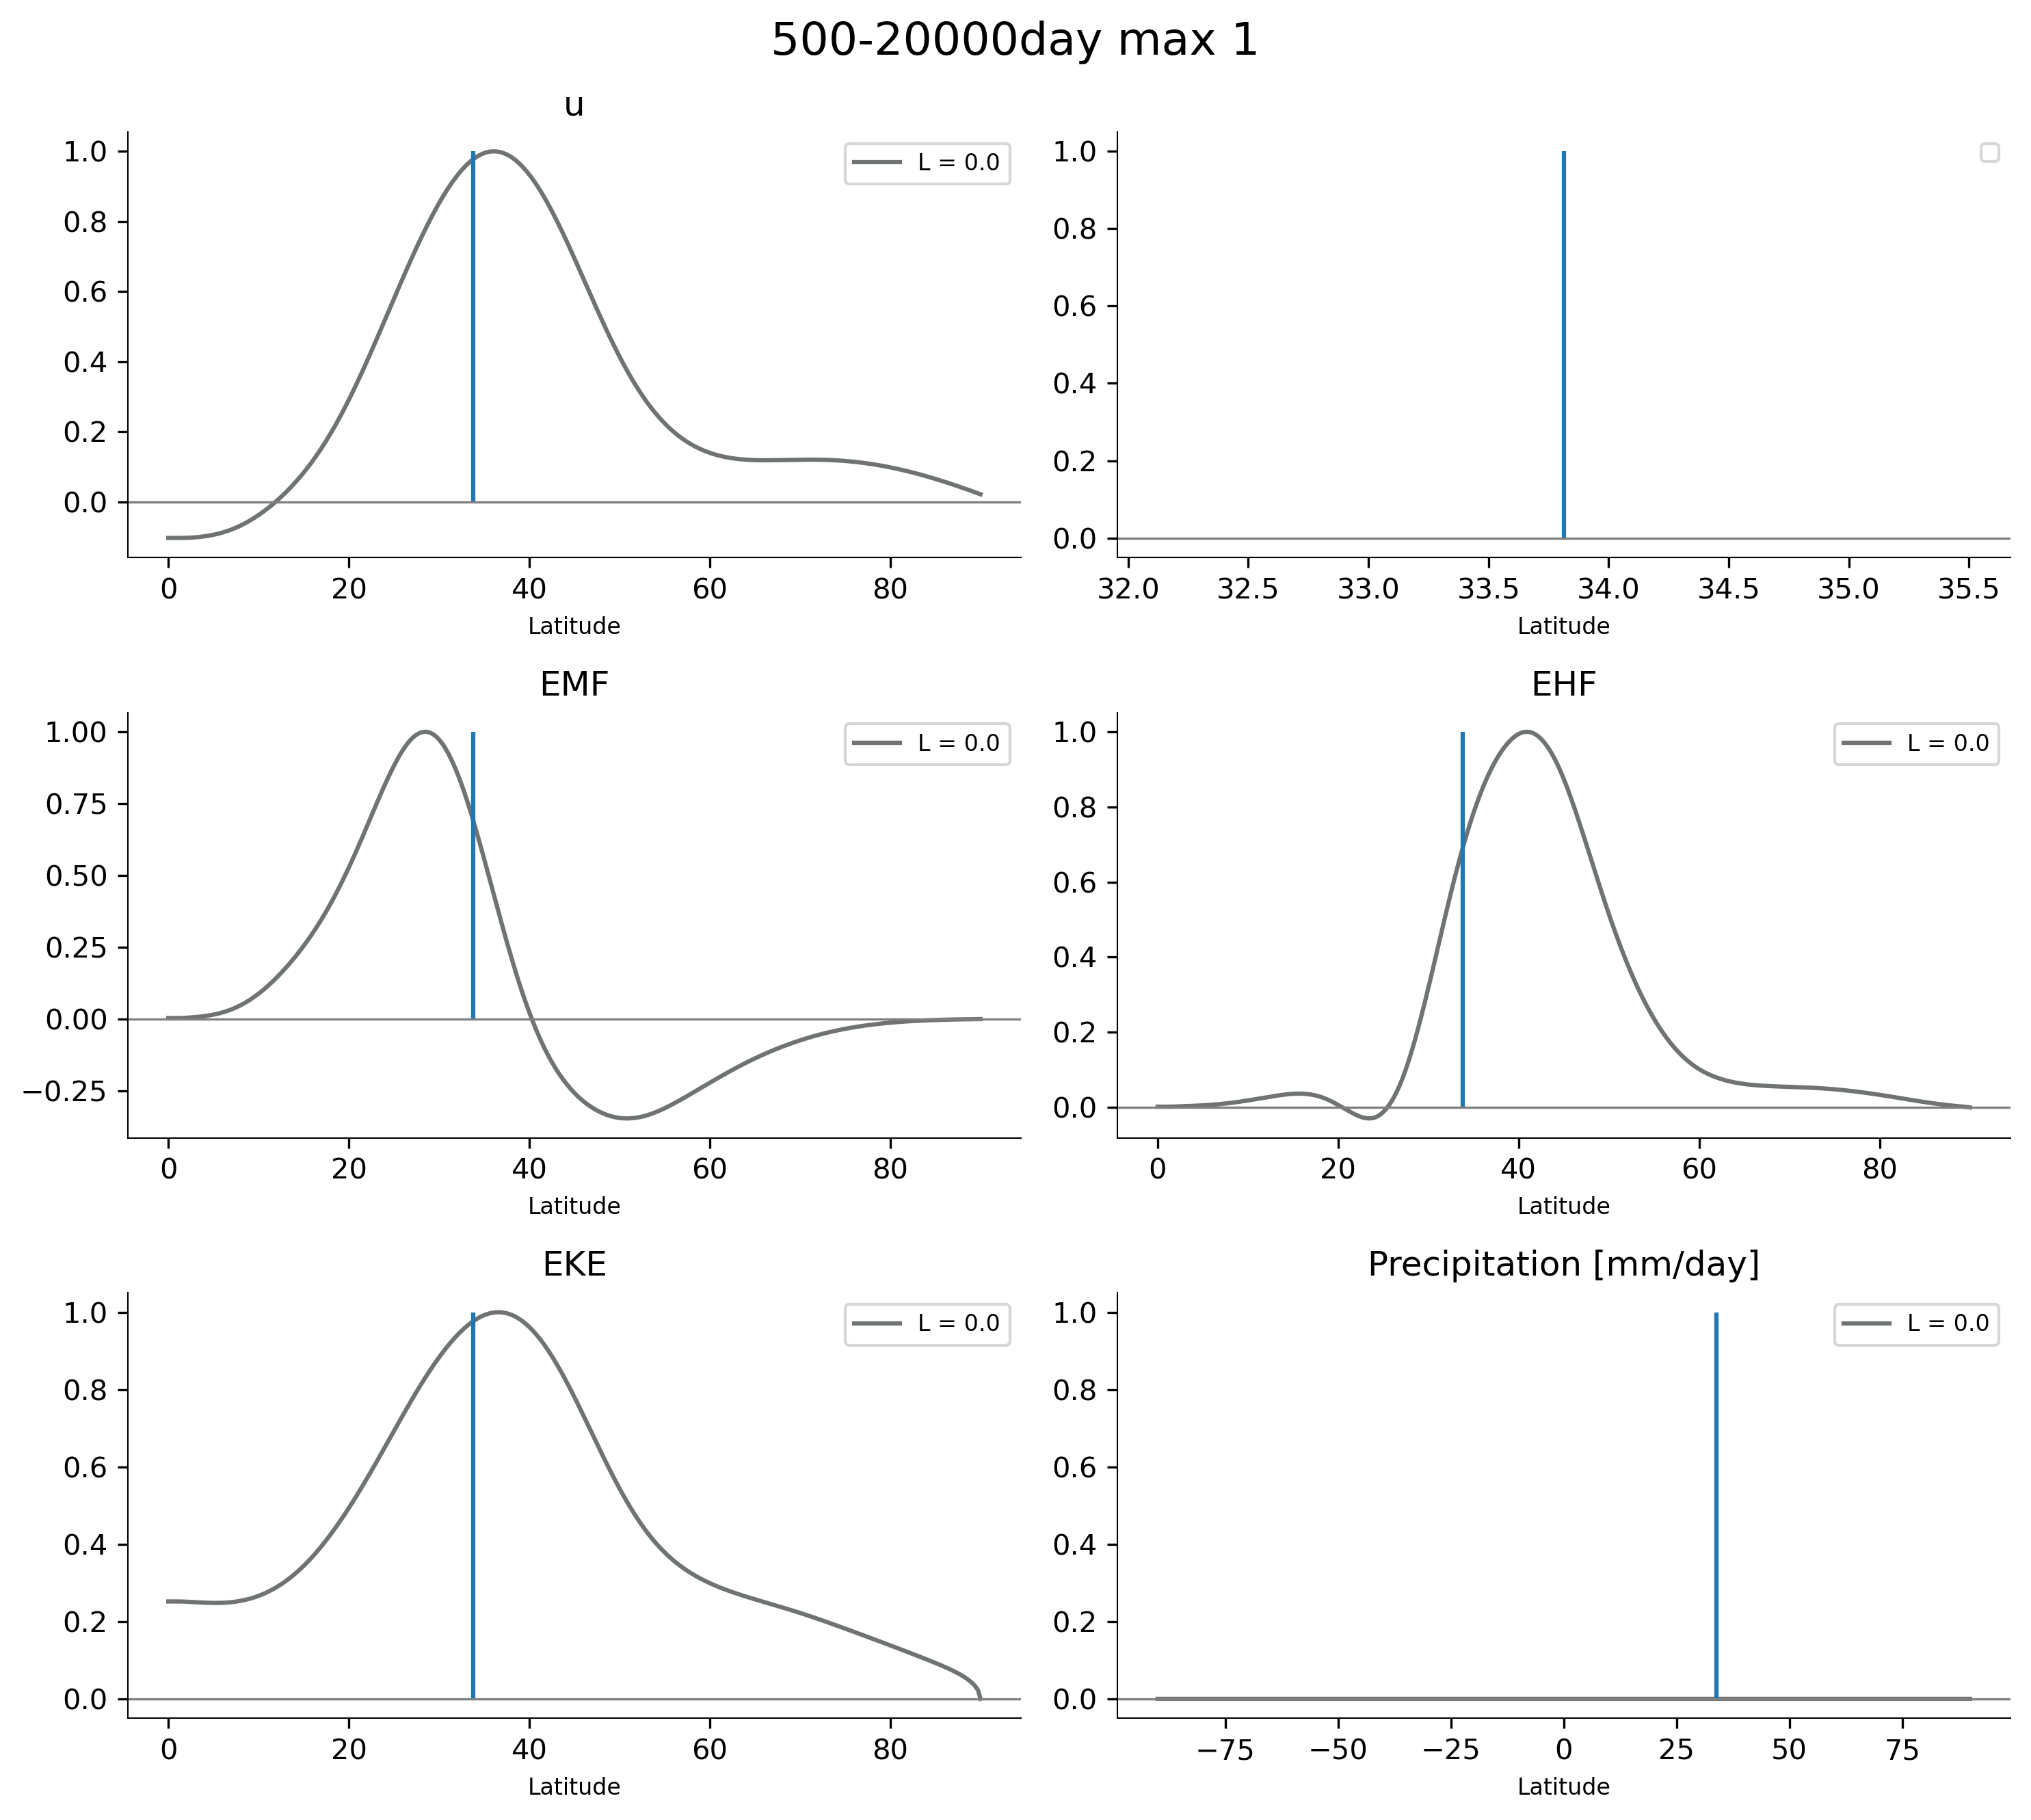

In [33]:
# EMF_check, EKE_thin_check, EHF_check, Prec_check = main()


In [34]:
# with h5py.File('PR0_500_20000day_EMF.h5','w') as EMF_file :
#     EMF_file.create_dataset('EMF',data=EMF_check)

# with h5py.File('PR0_500_20000day_EKE.h5','w') as EKE_file :
#     EKE_file.create_dataset('EKE',data=EKE_thin_check)

# with h5py.File('PR0_500_20000day_EHF.h5','w') as EHF_file :
#     EHF_file.create_dataset('EHF',data=EHF_check)

# with h5py.File('PR0_500_20000day_precipitation.h5','w') as precipitation_file :
#     precipitation_file.create_dataset('precipitation',data=Prec_check)

# print("EMF, EKE, EHF and Precipitation saving done")

EMF, EKE, EHF and Precipitation saving done


In [4]:
# EMF_file0      = h5py.File("PR0_500_20000day_EMF.h5", "r")
# EKE_file0      = h5py.File("PR0_500_20000day_EKE.h5", "r")
# EHF_file0      = h5py.File("PR0_500_20000day_EHF.h5", "r")
# prec_file0     = h5py.File("PR0_500_20000day_precipitation.h5", "r")


# EMF0       = np.asarray(EMF_file0["EMF"][:,:,:])
# EKE0       = np.asarray(EKE_file0["EKE"][:,:,:])
# EHF0       = np.asarray(EHF_file0["EHF"][:,:,:])
# Prec0      = np.asarray(prec_file0["precipitation"][:])

In [32]:
# a = 0
# # sigma coord.
# check_days_length = int(end-start)
# sigma_mean = np.nanmean(Pzm[a,-check_days_length:, :, :] / PSzm[a,-check_days_length:, :, :], axis=(0))
# sigma_onlyz = np.nanmean(sigma_mean, axis=1)
# y = np.linspace(-90, 90, 64)
# yy, sigma_mean2 = np.meshgrid(y, sigma_onlyz)




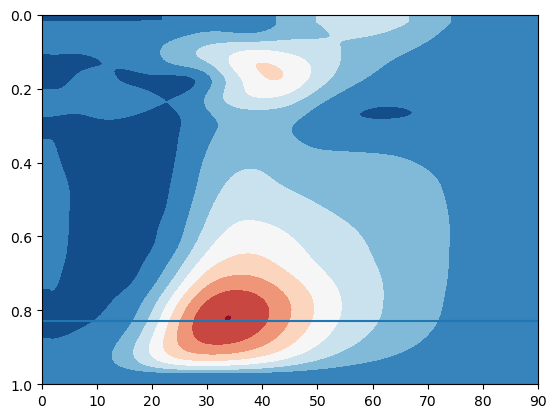

In [33]:
# interpolation_times = 10
# yys = np.linspace(0, 90, 32 * interpolation_times)
# sigma_mean2s = np.linspace(0, 1, 20 * interpolation_times)
# plt.figure()
# plt.contourf(yys, sigma_mean2s, EHF0[a], cmap="RdBu_r")
# plt.ylim([1,0])
# plt.hlines(sigma_mean2s[165], xmin=0, xmax=90)
# # print()